In [ ]:
"""
공공주택관리비에 대한 관리비 분석 요구사항
전체 공동관리비를 1/n를 내는데 그게 시정사항이다.
ex) 엘레베이터를 고층과 저층에 따라 다르게 내야함


"""

In [ ]:
"""
1. 데이터 분석범위
-공용관리비에 한해서 분석함
다 읽고 분석 대상에 해당되는 것들만 뽑아도됨
-일반관리비, 청소비, 경비비... 수도 공용비까지
=>공용관리비 중 각각의 관리비가 차지하는 비중(시각화)
-일반관리비의 하위 항목들에 대해서도 차지하는 비중...
-파일 저장할 떄 항목별로 저장하면 편함(기간에 따라 다르니)
-월/년/분기/계절별로 관리비 항목이 변화패턴?
-이상치 확인(시각화)
-상관분석:서로 상관계수가 큰 변수를 찾아볼수 잇음
         각 데이터가 기간별로 쭉 나와있어서 그걸로 상관분석
-------------------여기까지 오늘------------------
2. 예측/분류(RNN해보기)
"""

In [ ]:
"""
회사 제출 포트폴리오 용으로 만들기(잘만들기)
"""

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
month=['01','02','03','04','05','06','07','08','09','10','11','12']
year=['2015','2016','2017','2018','2019']
pathdate=[]
for i in year:
    for j in month:
        pathdate.append(i+j)

In [3]:
path0="C:/Users/ilike/관리비데이터/"
path2=" 가양도시개발공사8단지(임대).xls"

pathlist=[]
for i in range(len(pathdate)):
    pathlist.append(path0+pathdate[i]+path2)

In [4]:
pathlist

['C:/Users/ilike/관리비데이터/201501 가양도시개발공사8단지(임대).xls',
 'C:/Users/ilike/관리비데이터/201502 가양도시개발공사8단지(임대).xls',
 'C:/Users/ilike/관리비데이터/201503 가양도시개발공사8단지(임대).xls',
 'C:/Users/ilike/관리비데이터/201504 가양도시개발공사8단지(임대).xls',
 'C:/Users/ilike/관리비데이터/201505 가양도시개발공사8단지(임대).xls',
 'C:/Users/ilike/관리비데이터/201506 가양도시개발공사8단지(임대).xls',
 'C:/Users/ilike/관리비데이터/201507 가양도시개발공사8단지(임대).xls',
 'C:/Users/ilike/관리비데이터/201508 가양도시개발공사8단지(임대).xls',
 'C:/Users/ilike/관리비데이터/201509 가양도시개발공사8단지(임대).xls',
 'C:/Users/ilike/관리비데이터/201510 가양도시개발공사8단지(임대).xls',
 'C:/Users/ilike/관리비데이터/201511 가양도시개발공사8단지(임대).xls',
 'C:/Users/ilike/관리비데이터/201512 가양도시개발공사8단지(임대).xls',
 'C:/Users/ilike/관리비데이터/201601 가양도시개발공사8단지(임대).xls',
 'C:/Users/ilike/관리비데이터/201602 가양도시개발공사8단지(임대).xls',
 'C:/Users/ilike/관리비데이터/201603 가양도시개발공사8단지(임대).xls',
 'C:/Users/ilike/관리비데이터/201604 가양도시개발공사8단지(임대).xls',
 'C:/Users/ilike/관리비데이터/201605 가양도시개발공사8단지(임대).xls',
 'C:/Users/ilike/관리비데이터/201606 가양도시개발공사8단지(임대).xls',
 'C:/Users/ilike/관리비데이터/201607 가양도시개발공사8단지(임대)

In [5]:
AptManagement=pd.read_excel("C:/Users/ilike/관리비\
데이터/아파트 관리비 샘플.xls",header=1)


In [6]:
datafile=[]
for i in range(len(pathlist)):
    datafile.append(pd.read_excel(pathlist[i],header=1))

In [7]:
datafile[2].columns

Index(['분류', '우리단지총액', '우리단지단가(주거전용면적기준)', '유사단지군 평균', '관리비수준',
       '유사단지비교(주거전용면적기준)', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       '평형별(주거전용면적기준)', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12',
       'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16',
       '우리단지단가(주거전용면적 기준)'],
      dtype='object')

In [8]:
pathdate[0:2]

['201501', '201502']

In [9]:
templist=list(zip(pathdate,datafile))
#pathdate   # <-201501 ~... ~ 201912

In [10]:
templist[0][1]['분류']

0     분류 (클릭시 상세내역표시)
1               공용관리비
2               일반관리비
3                 인건비
4                  급여
           ...       
66               월사용액
67              충당금잔액
68            적립요율(%)
69                 합계
70                잡수입
Name: 분류, Length: 71, dtype: object

In [51]:
len(pathdate)

60

<BarContainer object of 7 artists>

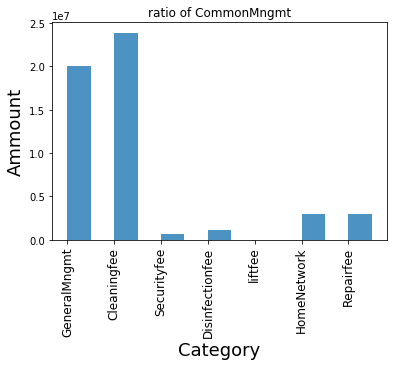

In [18]:
#tempint
CommonMngmetCategory=[GeneralMngmt,Cleaningfee,
                     Securityfee,Disinfectionfee,
                     liftfee,HomeNetwork,Repairfee]
CommonMngmetCategory_str=['GeneralMngmt',
       'Cleaningfee','Securityfee',
       'Disinfectionfee','liftfee',
       'HomeNetwork','Repairfee']

plt.title('ratio of CommonMngmt')
plt.xlabel('Category',fontsize=18)
plt.ylabel('Ammount',fontsize=18)
plt.xticks(fontsize=12,rotation=90)
plt.bar(CommonMngmetCategory_str,CommonMngmetCategory,
        alpha=0.8,width=0.5,
        align='edge')

([<matplotlib.patches.Wedge at 0x21df4d33a08>,
 [Text(0.3735738223039748, 1.0346219596012827, 'GeneralMngmt'),
  Text(-0.7952571318698702, -0.7599776932319183, 'Cleaningfee'),
  Text(0.6981470866048596, -0.8500533191895359, 'Securityfee'),
  Text(0.7845647197945103, -0.7710111545585847, 'Disinfectionfee'),
  Text(0.8341176275658904, -0.7171107190551894, 'liftfee'),
  Text(0.9476476047953726, -0.5585373909825496, 'HomeNetwork'),
  Text(1.082711558586113, -0.19425673966179569, 'Repairfee')],
 [Text(0.20376753943853168, 0.5643392506916087, '39.0%'),
  Text(-0.43377661738356554, -0.41453328721740995, '46.3%'),
  Text(0.3808075017844688, -0.46366544683065586, '1.3%'),
  Text(0.42794439261518735, -0.4205515388501371, '2.1%'),
  Text(0.45497325139957645, -0.39115130130283055, '0.0%'),
  Text(0.5168986935247486, -0.3046567587177543, '5.7%'),
  Text(0.5905699410469706, -0.10595822163370673, '5.7%')])

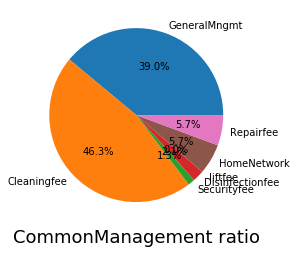

In [19]:
CommonMngmetCategory=[GeneralMngmt,Cleaningfee,
                     Securityfee,Disinfectionfee,
                     liftfee,HomeNetwork,Repairfee]
CommonMngmetCategory_str=['GeneralMngmt',
       'Cleaningfee','Securityfee',
       'Disinfectionfee','liftfee',
       'HomeNetwork','Repairfee']

plt.xlabel('CommonManagement ratio',fontsize=18)
plt.xticks(fontsize=12,rotation=90)
plt.pie(CommonMngmetCategory,
       labels=CommonMngmetCategory_str,
       autopct='%1.1f%%')

In [28]:
templist[0][0]

'201501'

In [36]:
str(201505)+'common ratio'

'201505common ratio'

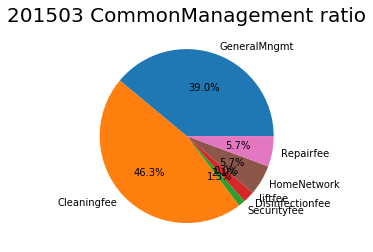

In [38]:
CommonMngmetCategory_str=['GeneralMngmt',
       'Cleaningfee','Securityfee',
       'Disinfectionfee','liftfee',
       'HomeNetwork','Repairfee']
def PieCommonMngmt(date):
    date=int(date)
    for i in range(len(templist)):
        if int(templist[i][0])==date:
            tempint=templist[i][1]['우리단지총액'][1:].astype(int)
            CommonMngmt=tempint[1]
            GeneralMngmt=tempint[2]
            Cleaningfee=tempint[34]
            Securityfee=tempint[35]
            Disinfectionfee=tempint[36]
            liftfee=tempint[37]
            HomeNetwork=tempint[38]
            Repairfee=tempint[39]
            Consignment=tempint[44]
            title=str(date)+' '+'CommonManagement ratio'
            plt.title(title,fontsize=20)
            plt.xticks(fontsize=12,rotation=90)
            plt.pie(CommonMngmetCategory,
                    labels=CommonMngmetCategory_str,
                    autopct='%1.1f%%')
            plt.show()
        else:
            pass
PieCommonMngmt(201503)

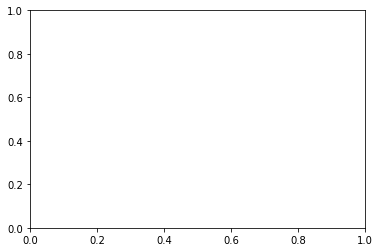

In [ ]:
CommonMngmetCategory=[GeneralMngmt,Cleaningfee,
                     Securityfee,Disinfectionfee,
                     liftfee,HomeNetwork,Repairfee]
CommonMngmetCategory_str=['GeneralMngmt',
       'Cleaningfee','Securityfee',
       'Disinfectionfee','liftfee',
       'HomeNetwork','Repairfee']
plt.xlabel('CommonManagement ratio',fontsize=18)
plt.xticks(fontsize=12,rotation=90)
plt.pie(CommonMngmetCategory,
       labels=CommonMngmetCategory_str,
       autopct='%1.1f%%')

In [14]:
label_str=['CommonMngmt','GeneralMngmt',
       'Cleaningfee','Securityfee',
       'Disinfectionfee','liftfee',
       'HomeNetwork','Repairfee',
      'Consignment','Heatingcost','Hotwater',
      'Gasfee','Electricity','Waterfee']

<BarContainer object of 14 artists>

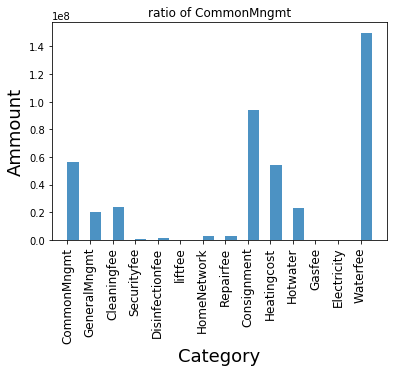

In [15]:
tempint=templist[0][1]['우리단지총액'][1:].astype(int)
CommonMngmt=tempint[1]
GeneralMngmt=tempint[2]
Cleaningfee=tempint[34]
Securityfee=tempint[35]
Disinfectionfee=tempint[36]
liftfee=tempint[37]
HomeNetwork=tempint[38]
Repairfee=tempint[39]
Consignment=tempint[44]
Heatingcost=tempint[47]
Hotwater=tempint[50]
Gasfee=tempint[53]
Electricity=tempint[56]
Waterfee=tempint[69]
label=[CommonMngmt,GeneralMngmt,
       Cleaningfee,Securityfee,
       Disinfectionfee,liftfee,
       HomeNetwork,Repairfee,
      Consignment,Heatingcost,Hotwater,
      Gasfee,Electricity,Waterfee]
CommonMngmetCategory=[GeneralMngmt,Cleaningfee,
                     Securityfee,Disinfectionfee,
                     liftfee,HomeNetwork,Repairfee]
plt.title('ratio of CommonMngmt')
plt.xlabel('Category',fontsize=18)
plt.ylabel('Ammount',fontsize=18)
plt.xticks(fontsize=12,rotation=90)
plt.bar(label_str,label,
        alpha=0.8,width=0.5,
        align='edge')


In [9]:
columnlist=list(AptManagement.columns)

In [10]:
classification=input()
columnneed=input()
def getdata():
    for i in range(len(AptManagement['분류'])):
        if classification == AptManagement['분류'][i]:
            return AptManagement['분류'][i]+":"+AptManagement[columnneed][i]
getdata()

  일반관리비
우리단지총액


'  일반관리비:18729750'

In [ ]:
In [2]: df = pd.DataFrame({'id': ['a', 'b', 'c', 'd'],

   ...: 'col_1': [1, 2, 3, 4],

   ...: 'col_2': [1, 1, 2, 2]},

   ...: columns = ['id', 'col_1', 'col_2'])

In [ ]:
pd.DataFrame()

In [65]:
AptManagement['분류'][2]

'  일반관리비'

In [11]:
print(AptManagement['분류'],AptManagement['우리단지총액'])

0     분류 (클릭시 상세내역표시)
1               공용관리비
2               일반관리비
3                 인건비
4                  급여
           ...       
67               월사용액
68              충당금잔액
69            적립요율(%)
70                 합계
71                잡수입
Name: 분류, Length: 72, dtype: object 0       우리단지총액
1     52894120
2     18729750
3     17836250
4     10535000
        ...   
67           0
68           0
69           0
70    76768592
71      926340
Name: 우리단지총액, Length: 72, dtype: object


In [12]:
AptManagement['평형별(주거전용면적기준)']

0      34.44㎡
1       40019
2     14170.7
3     13494.7
4     7970.65
       ...   
67          0
68          0
69          0
70    58082.1
71    700.857
Name: 평형별(주거전용면적기준), Length: 72, dtype: object